<a href="https://colab.research.google.com/github/gabrielletaree/Clear-and-Blur-Image-Exploration-using-Sobel-Canny-Laplacian-Method/blob/main/UTS_Viskom_017_048_051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import scipy.stats
import pandas as pd
import matplotlib.image as mpimg

In [ ]:
!gdown 1mm6HYGsB_FGiT7QfHJJvNaVD9aX-JR-W

!unzip '/content/Seq_260123_2.zip'

Downloading...
From: https://drive.google.com/uc?id=1mm6HYGsB_FGiT7QfHJJvNaVD9aX-JR-W
To: /content/PCB.zip
100% 15.4M/15.4M [00:00<00:00, 52.9MB/s]
Archive:  /content/Seq_260123_2.zip
  inflating: Seq_260123_2/WIN_20230126_05_06_13_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_18_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_23_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_29_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_34_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_39_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_44_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_49_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_55_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_00_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_05_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_10_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_15_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_20_Pro.jpg  
  in

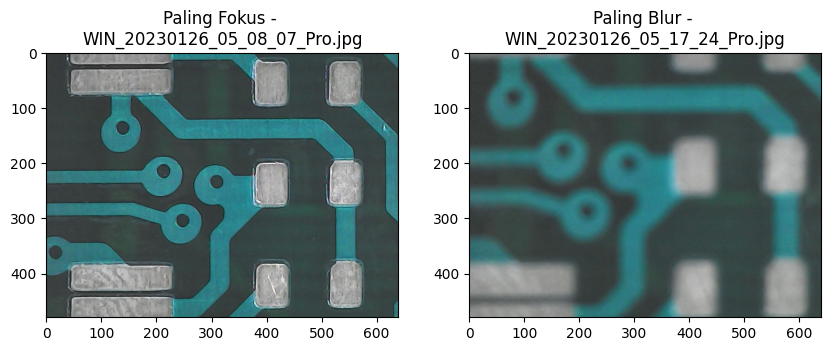

,Image,Laplacian,Sobel,Canny,Average Score,Rank
30,WIN_20230126_05_08_07_Pro.jpg,533.040,1000948.150,0.050,333827.080,1
37,WIN_20230126_05_08_12_Pro.jpg,508.470,989838.120,0.050,330115.547,2
28,WIN_20230126_05_08_23_Pro.jpg,358.350,857300.460,0.040,285886.283,6
26,WIN_20230126_05_07_57_Pro.jpg,393.620,867671.540,0.040,289355.067,5
6,WIN_20230126_05_08_02_Pro.jpg,485.770,948092.150,0.040,316192.653,4
7,WIN_20230126_05_08_17_Pro.jpg,466.590,952597.620,0.040,317688.083,3
20,WIN_20230126_05_07_52_Pro.jpg,332.730,806473.080,0.040,268935.283,7
11,WIN_20230126_05_08_28_Pro.jpg,270.310,736486.690,0.040,245585.680,8
32,WIN_20230126_05_07_41_Pro.jpg,151.770,579698.060,0.030,193283.287,10
1,WIN_20230126_05_08_33_Pro.jpg,160.620,576555.460,0.030,192238.703,11


In [ ]:
def laplacian_variance(image):
    return round(cv2.Laplacian(image, cv2.CV_64F).var(), 2)

def gradient_magnitude(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return round(np.mean(sobelx**2 + sobely**2), 2)

def edge_density(image):
    edges = cv2.Canny(image, 100, 200)
    return round(np.float32(np.count_nonzero(edges)) / edges.size, 2)

def get_image_quality(image_path):
    # Ubah gambar ke grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    feats = []
    feats.append(laplacian_variance(image))
    feats.append(gradient_magnitude(image))
    feats.append(edge_density(image))

    return feats

if __name__ == '__main__':
    image_folder = '/content/Seq_260123_2'

    image_paths = []
    for img_name in os.listdir(image_folder):
        if os.path.isfile(os.path.join(image_folder, img_name)):
            image_paths.append((img_name, os.path.join(image_folder, img_name)))

    data = []
    for name, path in image_paths:
        qualities = get_image_quality(path)
        data.append([name] + qualities)

    columns = ['Image', 'Laplacian', 'Sobel', 'Canny']
    df = pd.DataFrame(data, columns=columns)

    df['Average Score'] = df.iloc[:, 1:].mean(axis=1)
    df['Rank'] = df['Average Score'].rank(ascending=False).astype(int)

    df_sorted = df.sort_values(by='Canny', ascending=False)

    pd.options.display.float_format = '{:.3f}'.format

    final_df = df_sorted[['Image', 'Laplacian', 'Sobel', 'Canny', 'Average Score', 'Rank']]

    clearest_path = os.path.join(image_folder, final_df.iloc[0]['Image'])
    blurriest_path = os.path.join(image_folder, final_df.iloc[-1]['Image'])

    clearest_image = mpimg.imread(clearest_path)
    blurriest_image = mpimg.imread(blurriest_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(clearest_image)
    plt.title('Paling Fokus - \n' + final_df.iloc[0]['Image'])

    plt.subplot(1, 2, 2)
    plt.imshow(blurriest_image)
    plt.title('Paling Blur - \n' + final_df.iloc[-1]['Image'])

    plt.show()

final_df

In [ ]:
!unzip '/content/drive/MyDrive/Kuliah/Visi Komputer/Seq_260123_2.zip'

Archive:  /content/drive/MyDrive/Kuliah/Visi Komputer/Seq_260123_2.zip
  inflating: Seq_260123_2/WIN_20230126_05_06_13_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_18_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_23_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_29_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_34_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_39_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_44_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_49_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_06_55_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_00_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_05_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_10_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_15_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_20_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_26_Pro.jpg  
  inflating: Seq_260123_2/WIN_20230126_05_07_31_Pro.jpg  
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 1z4rT0YFr-EQpyGwWTK7WlfYF0lh7kevh

Downloading...
From: https://drive.google.com/uc?id=1z4rT0YFr-EQpyGwWTK7WlfYF0lh7kevh
To: /content/Seq_260123_2.zip
100% 2.24M/2.24M [00:00<00:00, 15.3MB/s]


<Figure size 1500x1000 with 0 Axes>

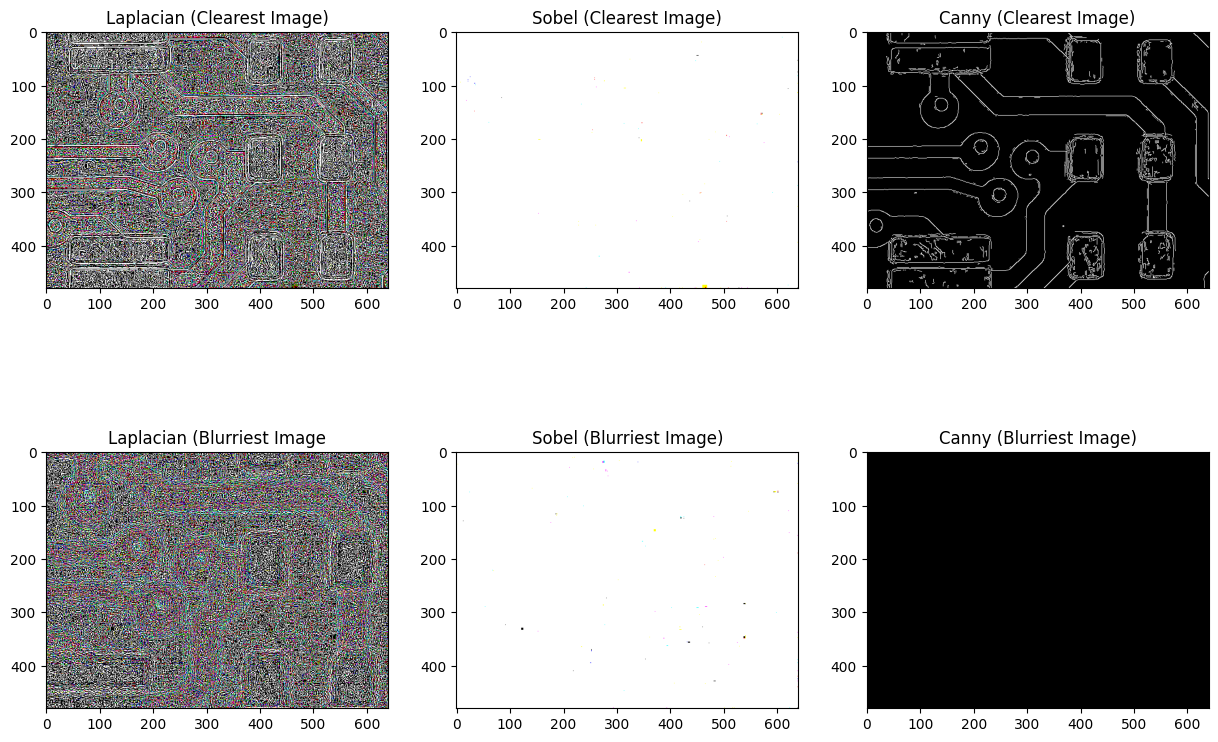

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def laplacian_variance(image):
    return round(cv2.Laplacian(image, cv2.CV_64F).var(), 2)

def gradient_magnitude(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return round(np.mean(sobelx**2 + sobely**2), 2)

def edge_density(image):
    edges = cv2.Canny(image, 100, 200)
    return round(np.float32(np.count_nonzero(edges)) / edges.size, 2)

def get_image_quality(image_path):
    # Ubah gambar ke grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    feats = []
    feats.append(laplacian_variance(image))
    feats.append(gradient_magnitude(image))
    feats.append(edge_density(image))

    return feats

if __name__ == '__main__':
    image_folder = '/content/Seq_260123_2'

    image_paths = []
    for img_name in os.listdir(image_folder):
        if os.path.isfile(os.path.join(image_folder, img_name)):
            image_paths.append((img_name, os.path.join(image_folder, img_name)))

    data = []
    for name, path in image_paths:
        qualities = get_image_quality(path)
        data.append([name] + qualities)

    columns = ['Image', 'Laplacian', 'Sobel', 'Canny']
    df = pd.DataFrame(data, columns=columns)

    df['Average Score'] = df.iloc[:, 1:].mean(axis=1)
    df['Rank'] = df['Average Score'].rank(ascending=False).astype(int)

    df_sorted = df.sort_values(by='Average Score', ascending=False)

    pd.options.display.float_format = '{:.3f}'.format

    final_df = df_sorted[['Image', 'Laplacian', 'Sobel', 'Canny', 'Average Score', 'Rank']]

    clearest_path = os.path.join(image_folder, final_df.iloc[0]['Image'])
    blurriest_path = os.path.join(image_folder, final_df.iloc[-1]['Image'])

    clearest_image = mpimg.imread(clearest_path)
    blurriest_image = mpimg.imread(blurriest_path)

    # Menampilkan Hasil Konvolusi
    plt.figure(figsize=(15, 10))

    # Clearest Image
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.Laplacian(clearest_image, cv2.CV_64F), cmap='gray')
    plt.title('Laplacian (Clearest Image)')

    sobelx_clear = cv2.Sobel(clearest_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely_clear = cv2.Sobel(clearest_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_clear = np.sqrt(sobelx_clear**2 + sobely_clear**2)
    plt.subplot(2, 3, 2)
    plt.imshow(sobel_clear, cmap='gray')
    plt.title('Sobel (Clearest Image)')

    plt.subplot(2, 3, 3)
    plt.imshow(cv2.Canny(clearest_image, 100, 200), cmap='gray')
    plt.title('Canny (Clearest Image)')

    # Blurriest Image
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.Laplacian(blurriest_image, cv2.CV_64F), cmap='gray')
    plt.title('Laplacian (Blurriest Image')

    sobelx_blur = cv2.Sobel(blurriest_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely_blur = cv2.Sobel(blurriest_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_blur = np.sqrt(sobelx_blur**2 + sobely_blur**2)
    plt.subplot(2, 3, 5)
    plt.imshow(sobel_blur)
    plt.title('Sobel (Blurriest Image)')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.Canny(blurriest_image, 100, 200), cmap='gray')
    plt.title('Canny (Blurriest Image)')

    plt.show()